In [1]:
options(repr.plot.width=8, repr.plot.height=4)

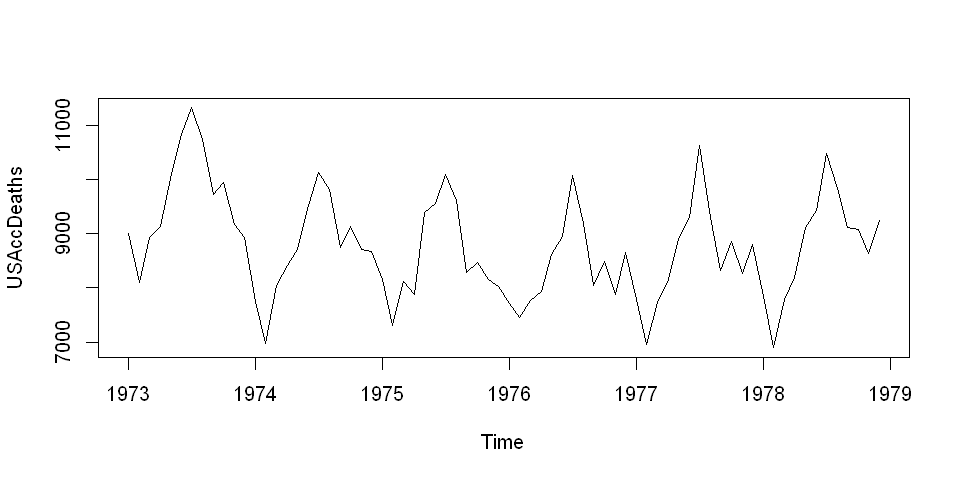

In [2]:
plot(USAccDeaths)

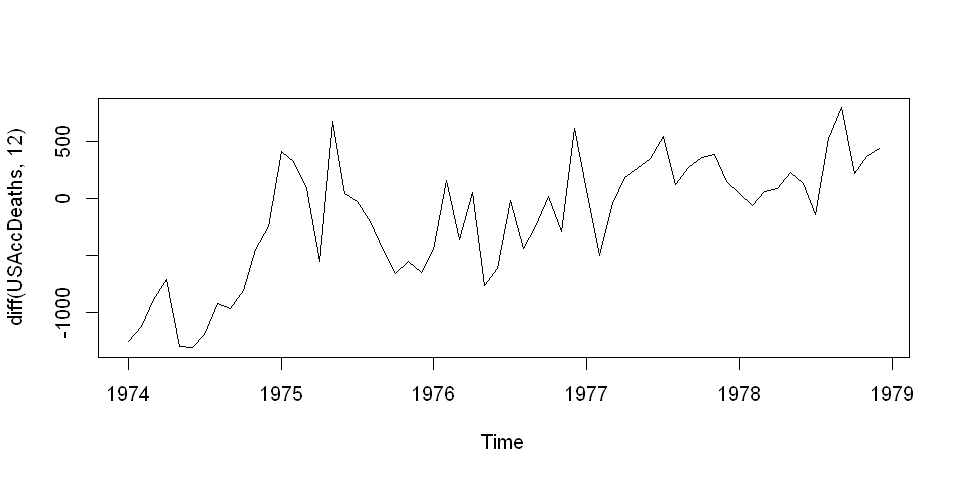

In [3]:
plot(diff(USAccDeaths, 12))

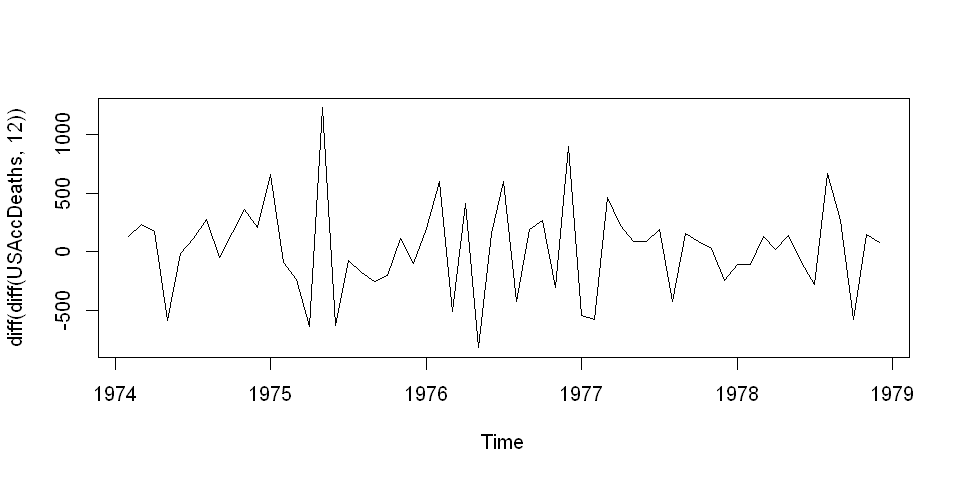

In [4]:
plot(diff(diff(USAccDeaths, 12)))

In [5]:
death.diff <- diff(diff(USAccDeaths, 12))

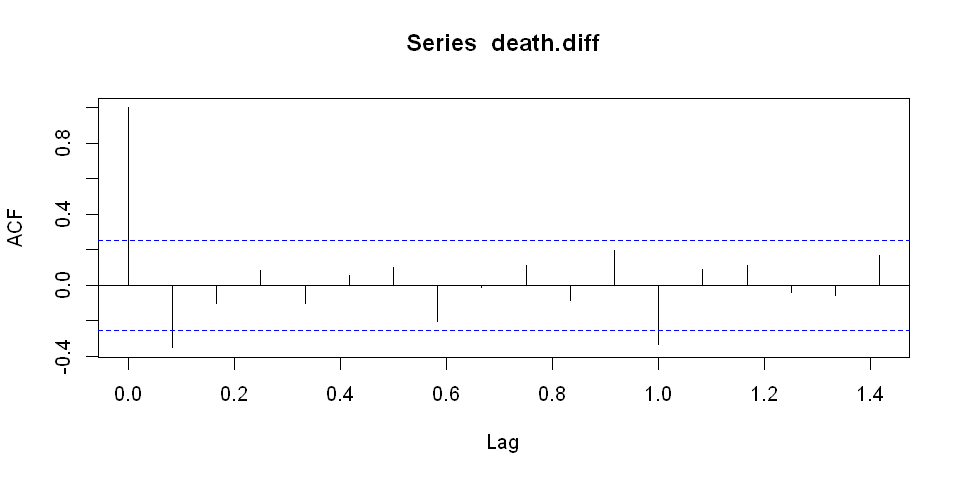

In [6]:
acf(death.diff)

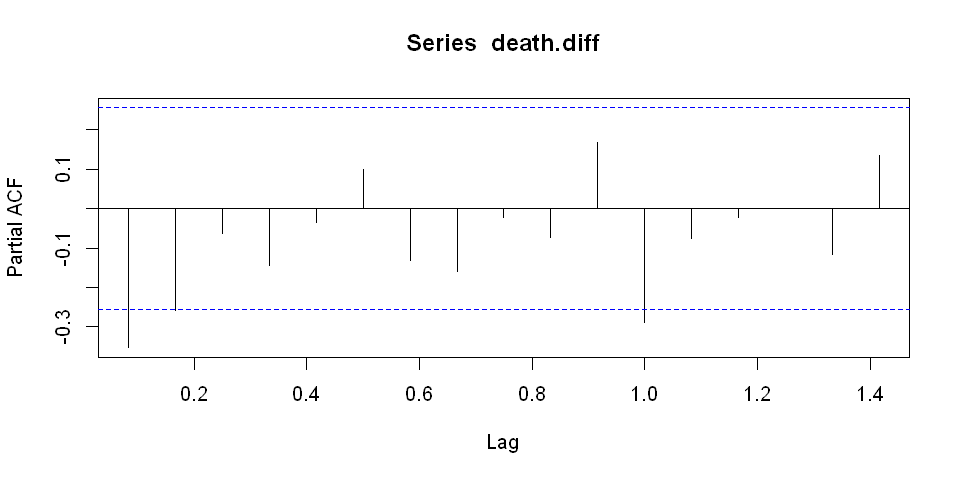

In [7]:
pacf(death.diff)

In [8]:
d <- 1
D <- 1
s <- 12
df.results <- data.frame()

for (p in 0:2) {
    for (q in 0:1) {
        for (P in 0:1) {
            for (Q in 0:1) {
                model <- arima(x=USAccDeaths, order=c(p, d, q), seasonal=list(order=c(P, D, Q), period=s))
                p.value <- Box.test(model$residuals, lag=log(length(model$residuals)))$p.value
                df.result <- data.frame(
                    model=paste("SARIMA(", paste(p, d, q, P, D, Q, sep=","), "), ", s, sep=""), 
                    AIC=model$aic, SSE=sum(resid(model)^2), P.value=p.value)
                df.results <- rbind(df.results, df.result)
            }
        }
    }
}

In [9]:
df.results

model,AIC,SSE,P.value
"SARIMA(0,1,0,0,1,0), 12",873.6886,9013344,0.03319200
"SARIMA(0,1,0,0,1,1), 12",864.1295,6850982,0.02092085
"SARIMA(0,1,0,1,1,0), 12",868.2989,7745049,0.01424955
"SARIMA(0,1,0,1,1,1), 12",865.1162,5574898,0.03342400
"SARIMA(0,1,1,0,1,0), 12",864.5135,7424115,0.91665783
"SARIMA(0,1,1,0,1,1), 12",856.8800,5863035,0.67648838
"SARIMA(0,1,1,1,1,0), 12",859.8826,6464791,0.68336330
"SARIMA(0,1,1,1,1,1), 12",858.0494,4799977,0.78991513
"SARIMA(1,1,0,0,1,0), 12",868.2440,7928362,0.30614900
"SARIMA(1,1,0,0,1,1), 12",859.2828,6040686,0.32634602


In [10]:
df.results[which.min(df.results$AIC),]

,model,AIC,SSE,P.value
6,"SARIMA(0,1,1,0,1,1), 12",856.88,5863035,0.6764884


initial  value 5.968253 
iter   2 value 5.813501
iter   3 value 5.809452
iter   4 value 5.805777
iter   5 value 5.805632
iter   6 value 5.805618
iter   7 value 5.805618
iter   7 value 5.805618
iter   7 value 5.805618
final  value 5.805618 
converged
initial  value 5.796764 
iter   2 value 5.792329
iter   3 value 5.791962
iter   4 value 5.791909
iter   4 value 5.791909
iter   4 value 5.791909
final  value 5.791909 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1     sma1
      -0.4303  -0.5528
s.e.   0.1228   0.1784

sigma^2 estimated as 99347:  log likelihood = -425.44,  aic = 856.88

$degrees_of_freedom
[1] 57

$ttable
     Estimate     SE t.value p.value
ma1   -0.4303 0.1228 -3.5037   9e-04
sma1  -0.5528 0.1784 -3.0991   3e-03

$AIC
[1] 12.24114

$AICc
[1] 12.2437

$BIC
[1] 12.33018


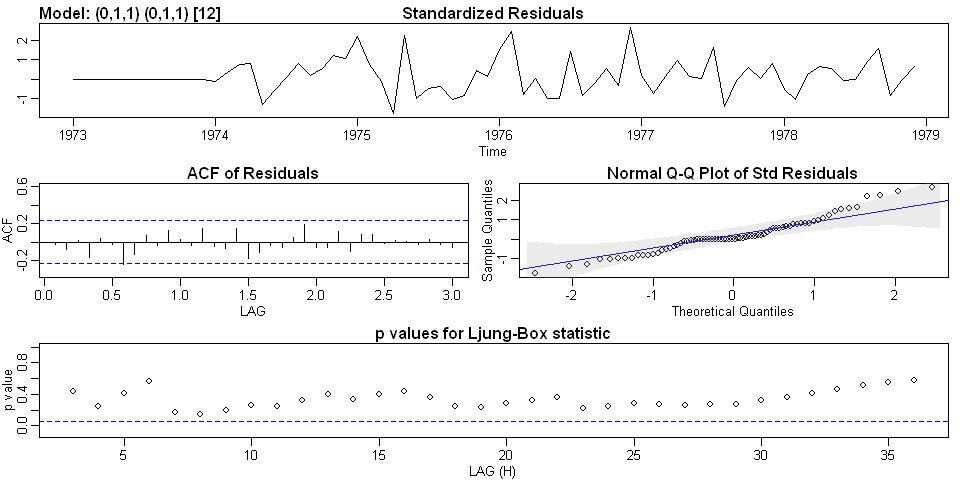

In [11]:
library(astsa)

sarima(USAccDeaths, 0, 1, 1, 0, 1, 1, 12)

Warning message:
"package 'forecast' was built under R version 3.6.1"

         Point Forecast     Lo 80     Hi 80    Lo 95     Hi 95
Jan 1979       8336.061  7931.798  8740.324 7717.794  8954.328
Feb 1979       7531.829  7066.619  7997.040 6820.351  8243.307
Mar 1979       8314.644  7795.594  8833.694 7520.825  9108.462
Apr 1979       8616.869  8049.062  9184.676 7748.483  9485.255
May 1979       9488.913  8876.216 10101.609 8551.874 10425.951
Jun 1979       9859.757  9205.243 10514.272 8858.764 10860.751
Jul 1979      10907.470 10213.654 11601.287 9846.369 11968.571
Aug 1979      10086.508  9355.500 10817.517 8968.527 11204.489
Sep 1979       9164.959  8398.561  9931.357 7992.855 10337.064
Oct 1979       9384.259  8584.036 10184.483 8160.423 10608.096
Nov 1979       8884.974  8052.298  9717.650 7611.505 10158.443
Dec 1979       9376.574  8512.663 10240.485 8055.336 10697.811
Jan 1980       8522.584  7565.646  9479.523 7059.073  9986.095
Feb 1980       7718.352  6705.068  8731.637 6168.667  9268.037
Mar 1980       8501.167  7434.508  9567.825 6869.853 10

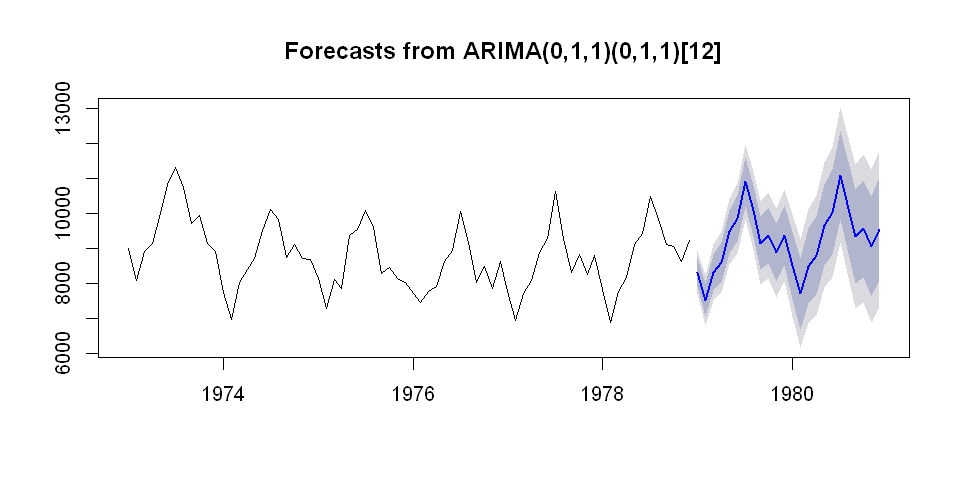

In [12]:
suppressMessages(library(forecast))

model <- arima(x=USAccDeaths, order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=12))
death.forecast <- forecast(model)
death.forecast
plot(death.forecast)

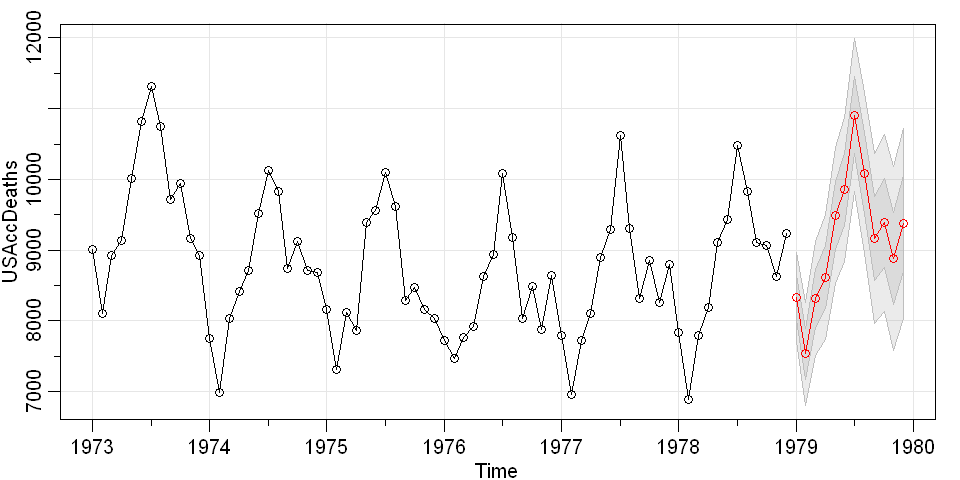

In [13]:
model2 <- sarima.for(USAccDeaths, 12, 0, 1, 1, 0, 1, 1, 12)